In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={
    'figure.figsize':(12,10),
})

In [3]:
df = pl.read_csv('data/music-info-clean.csv')
df.head(5)

track_id,name,artist,spotify_preview_url,spotify_id,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,playcount
str,str,str,str,str,i64,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64,str,i64
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""rock;alternati…",990
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""rock;electroni…",98
"""TRIQWYH128F148…","""Paranoid Andro…","""Radiohead""","""https://p.scdn…","""0bomiLGPTUNyk3…",2012,384933,0.232,0.8,5,-6.863,1,0.0573,0.0523,0.00606,0.118,0.299,81.849,4,"""90s;indie;indi…",1075
"""TRUOEWJ128F934…","""Stairway to He…","""Led Zeppelin""","""https://p.scdn…","""03hLW9osM6UuNq…",2013,488019,0.354,0.361,9,-12.722,0,0.0509,0.625,0.0112,0.35,0.212,80.36,4,"""punk;rock;70s;…",566
"""TRNNGMK128F423…","""Where Is My Mi…","""Pixies""","""https://p.scdn…","""0DJU6KGwdkxEPC…",2005,230093,0.514,0.435,4,-13.517,1,0.0353,0.0078,0.000859,0.0802,0.212,82.104,4,"""alternative_ro…",32185


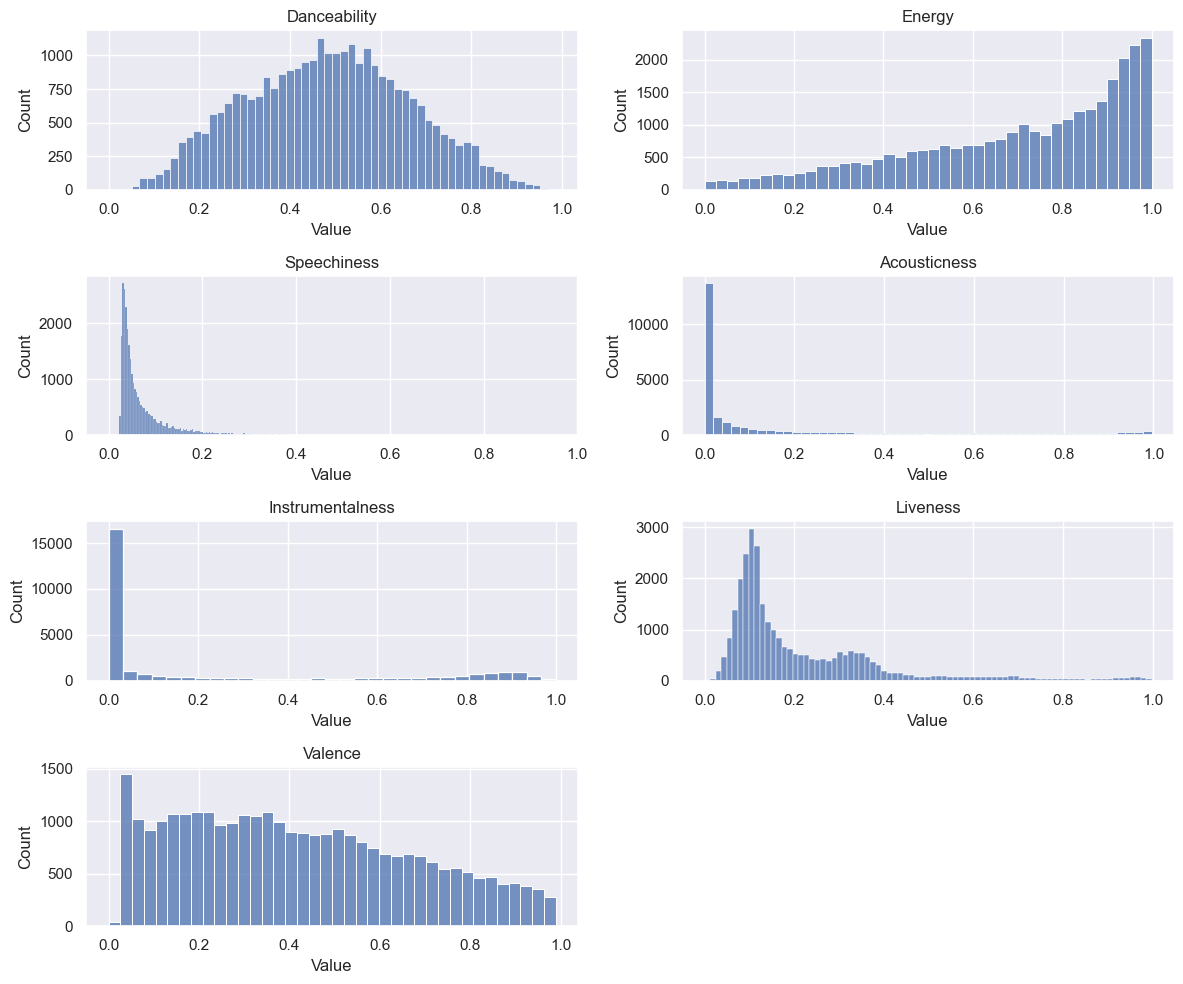

In [11]:
attributes = [
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence'
]

N = 8
fig, axes  = plt.subplots(nrows= N // 2, ncols=2)

for i, attribute in enumerate(attributes):
    ax: plt.Axes = axes[i // 2, i % 2]
    sns.histplot(x = df.select(pl.col(attribute)).to_numpy().flatten(), ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    ax.set_title(attribute.capitalize())

axes[N // 2 - 1, 2 - 1].remove()

plt.tight_layout()
plt.show()